<a href="https://colab.research.google.com/github/Kaancnkya/amazon_reviews_sentiment/blob/main/amazon_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import zipfile
import os

zip_path = "/content/sorted_data_acl.zip"

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall("/content/sorted_data_acl")

## Extracting the Dataset and Verifying the Directory Structure

In this first step, we imported the ZIP file containing the ACL Amazon review dataset, extracted it into the working directory, and verified that all domain folders were correctly unpacked.

After extraction, the folder structure is as follows:

```
sorted_data_acl/
    books/
        positive.review
        negative.review
        unlabeled.review
    dvd/
        positive.review
        negative.review
        unlabeled.review
    electronics/
        positive.review
        negative.review
        unlabeled.review
    kitchen_&_housewares/
        positive.review
        negative.review
        unlabeled.review
```

This confirms that the dataset is successfully loaded and ready for preprocessing.

In the next step, we will separate the positive (`1`) and negative (`0`) review files and load them into a DataFrame for further cleaning and analysis.

In [6]:
import os
import pandas as pd
import re

base_dir = "sorted_data_acl/sorted_data_acl"

domains = ["books", "dvd", "electronics", "kitchen_&_housewares"]
labels = ["positive", "negative"]

rows = []

def extract_review_text(block):
    """<review_text> ... </review_text> extracting the text."""
    match = re.search(r"<review_text>([\s\S]*?)</review_text>", block)
    if match:
        return match.group(1).strip()
    return None

for domain in domains:
    for label in labels:
        file_path = os.path.join(base_dir, domain, f"{label}.review")
        print("Processing:", file_path)

        with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
            content = f.read()

        # Each review in blocks
        blocks = re.findall(r"<review>([\s\S]*?)</review>", content)

        for block in blocks:
            text = extract_review_text(block)
            if text:
                rows.append({
                    "text": text,
                    "label": 1 if label == "positive" else 0,
                    "domain": domain
                })

df = pd.DataFrame(rows)
df.head()

Processing: sorted_data_acl/sorted_data_acl/books/positive.review
Processing: sorted_data_acl/sorted_data_acl/books/negative.review
Processing: sorted_data_acl/sorted_data_acl/dvd/positive.review
Processing: sorted_data_acl/sorted_data_acl/dvd/negative.review
Processing: sorted_data_acl/sorted_data_acl/electronics/positive.review
Processing: sorted_data_acl/sorted_data_acl/electronics/negative.review
Processing: sorted_data_acl/sorted_data_acl/kitchen_&_housewares/positive.review
Processing: sorted_data_acl/sorted_data_acl/kitchen_&_housewares/negative.review


,text,label,domain
0,Sphere by Michael Crichton is an excellant nov...,1,books
1,Dr. Oz is an accomplished heart surgeon in the...,1,books
2,The most gorgeous artwork in comic books. Cont...,1,books
3,This book is for lovers of Robicheaux. His de...,1,books
4,This is going to be a short and sweet review b...,1,books


In [7]:
import nltk
from nltk.corpus import stopwords

# Download stopwords (run this ONCE – if you've already done it before, it's fine to run again)
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
# Base English stopwords from NLTK
stop_words = set(stopwords.words("english"))

print(len(stop_words), "stopwords loaded")
list(stop_words)[:20]  # quick peek at some


198 stopwords loaded


['aren',
 'won',
 'there',
 'herself',
 "she'll",
 'such',
 'yours',
 "you'd",
 'did',
 'yourselves',
 'a',
 'will',
 'again',
 'until',
 'down',
 't',
 'when',
 'have',
 'wouldn',
 'same']

In [9]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

# Critical words for sentiment — we remove these from the stopwords list
keep_words = {
    "but", "not", "no", "never", "none",
    "don't", "didn't", "isn't", "wasn't",
    "can't", "cannot",
    "however", "although", "though", "yet",
    "oh", "really", "just", "great"
}

# Remove them from stopwords
stop_words = stop_words - keep_words

def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", " ", text)
    text = re.sub(r"[^\w\s']", " ", text)
    text = re.sub(r"\d+", " ", text)
    text = re.sub(r"_+", " ", text)
    text = re.sub(r"\s+", " ", text).strip()

    # Apply stopwords while keeping the critical words for sentiment
    text = " ".join([w for w in text.split() if w not in stop_words])

    return text

In [10]:
import re

def clean_text(text):
    # Lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r"<.*?>", " ", text)

    # Remove punctuation BUT keep apostrophes (so "don't" stays "don't")
    text = re.sub(r"[^\w\s']", " ", text)

    # Remove digits
    text = re.sub(r"\d+", " ", text)

    # Remove multiple underscores
    text = re.sub(r"_+", " ", text)

    # Collapse multiple spaces
    text = re.sub(r"\s+", " ", text).strip()

    # Remove stopwords but keep critical sentiment words (because we removed them from stop_words)
    text = " ".join([w for w in text.split() if w not in stop_words])

    return text


In [11]:
samples = [
    "I absolutely loved this product, it worked perfectly!",
    "This is the worst thing I have ever bought.",
    "The package is damaged.",
    "The movie was fantastic and I would watch it again.",
    "I thought it would be great, but it's not good at all."
]

for s in samples:
    print("Original:", s)
    print("Cleaned: ", clean_text(s))
    print("-" * 60)


Original: I absolutely loved this product, it worked perfectly!
Cleaned:  absolutely loved product worked perfectly
------------------------------------------------------------
Original: This is the worst thing I have ever bought.
Cleaned:  worst thing ever bought
------------------------------------------------------------
Original: The package is damaged.
Cleaned:  package damaged
------------------------------------------------------------
Original: The movie was fantastic and I would watch it again.
Cleaned:  movie fantastic would watch
------------------------------------------------------------
Original: I thought it would be great, but it's not good at all.
Cleaned:  thought would great but not good
------------------------------------------------------------


## ✅ Summary of Previous Steps

- The dataset was extracted from the ZIP file and all folders inside **sorted_data_acl** were successfully loaded.
- Each domain (*books, dvd, electronics, kitchen & housewares*) was processed, and both `positive.review` and `negative.review` files were read.
- Reviews were separated using `<review> ... </review>` blocks, and only the actual text inside `<review_text> ... </review_text>` was extracted.
- A DataFrame was created with three columns:
  - **text** → the raw review text  
  - **label** → 1 for positive, 0 for negative  
  - **domain** → the product category the review belongs to
- Custom text-cleaning was applied:
  - lowercasing  
  - removing HTML-like tags  
  - removing punctuation, numbers, and extra whitespace  
  - removing stopwords **while keeping sentiment-critical words** such as *not, never, but, really, great, however*, etc.
- The resulting cleaned text was stored in a new column named **`clean_text`**, expanding the DataFrame to four columns.

---

## ▶️ Next Step

We will now convert the cleaned text in `clean_text` into numerical token sequences using **Tokenisation**, followed by:
- Padding  
- Train/Validation/Test split  

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# MAX SETTINGS
max_features = 20000   # max vocabulary size
sequence_length = 200  # max tokens per review

# 1) Clean Text
df["clean_text"] = df["text"].apply(clean_text)

# 2) 🔥 SHORT REVIEW FILTER — BURAYA EKLE!
df = df[df["clean_text"].str.split().str.len() >= 3]
df = df.reset_index(drop=True)

# 3) Vectorizer
vectorizer = TextVectorization(
    max_tokens=max_features,
    output_sequence_length=sequence_length,
    output_mode="int"
)

# 4) Vectorizer adapt
vectorizer.adapt(df["clean_text"].values)

# 5) Example
example = vectorizer(df["clean_text"].iloc[0])
example

<tf.Tensor: shape=(200,), dtype=int64, numpy=
array([14002,   905,  4844,     1,   216,   359,  6807,    82,  4844,
         777,    24,    34,  7709,   103,   121,  1083,  7818,  2198,
        2198,     1,  3145,     1,   887,  2194,  7197,  5551,   231,
        8559,   179,  1325,     1,   425,   442,  5551,   237,  2739,
          77, 14015,     1,  1080,  1112,  1193,  5551,   288,  4722,
       14016,  5585,  8559, 18572,   231,   416,  3756,    70,   828,
       13729,   176,   267,  7096,   828,   113,   502,   894,  1236,
         780,  1193,   828,  5551,   110,  1704,    55, 14016,   106,
         277,  1363,  5343,   295,  2095,   969,    38,  1146,    95,
          38,  1063,   216,     3,   611,  4844,   777,     2,    46,
          90,   311,  2184,    95,     1,  9389,  1387,  1211,  1318,
           8,  1591,    91,     5,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,   

In [13]:
from sklearn.model_selection import train_test_split
import numpy as np

# ---------------------------------------------------------
# 1) Split the dataset into:
#    - 70% training
#    - 30% temporary (will be split again into validation & test)
# ---------------------------------------------------------
train_text, temp_text, y_train, y_temp = train_test_split(
    df["clean_text"].values,
    df["label"].values,
    test_size=0.30,
    random_state=42
)

# ---------------------------------------------------------
# 2) Split the remaining 30% into:
#    - 15% validation
#    - 15% test
#    (50/50 split of the temporary set)
# ---------------------------------------------------------
val_text, test_text, y_val, y_test = train_test_split(
    temp_text,
    y_temp,
    test_size=0.50,
    random_state=42
)

# ---------------------------------------------------------
# 3) Shuffle (randomize) the training set
#    This helps avoid any accidental ordering patterns
# ---------------------------------------------------------
idx = np.arange(len(train_text))  # create index array
np.random.shuffle(idx)            # shuffle indices

train_text = train_text[idx]      # reorder training texts
y_train = y_train[idx]            # reorder training labels

In [14]:
import tensorflow as tf
batch_size = 32

# ---------------------------------------------------------
# 1) Create the training dataset
# ---------------------------------------------------------
train_ds = (
    tf.data.Dataset.from_tensor_slices((train_text, y_train))
    # Convert training text + labels into a TF Dataset structure.

    .shuffle(len(train_text))
    # Shuffle the entire dataset so the model does not learn any ordering pattern.

    .batch(batch_size)
    # Split the data into batches for efficient GPU/CPU training.
)

# ---------------------------------------------------------
# 2) Create the validation dataset
# ---------------------------------------------------------
val_ds = tf.data.Dataset.from_tensor_slices((val_text, y_val)).batch(batch_size)
# No shuffling here — validation must stay consistent for comparison.

# ---------------------------------------------------------
# 3) Create the test dataset
# ---------------------------------------------------------
test_ds = tf.data.Dataset.from_tensor_slices((test_text, y_test)).batch(batch_size)
# Also not shuffled — used only for final model evaluation.

In [15]:
EMB = 50

# ---------------------------------------------------------
# 1) Input layer — raw text comes in as strings
# ---------------------------------------------------------
inputs = tf.keras.Input(shape=(), dtype=tf.string)

# ---------------------------------------------------------
# 2) Text vectorization (tokenization + integer mapping)
# ---------------------------------------------------------
x = vectorizer(inputs)

# ---------------------------------------------------------
# 3) Embedding layer
#    Converts integer tokens into dense 50-dimensional vectors
# ---------------------------------------------------------
x = tf.keras.layers.Embedding(max_features, EMB)(x)

# ---------------------------------------------------------
# 4) Convolutional layer (CNN)
#    - Extracts local n-gram patterns
#    - Detects short sentiment phrases like "not good", "very bad"
# ---------------------------------------------------------
x = tf.keras.layers.Conv1D(64, 5, activation="relu")(x)

# ---------------------------------------------------------
# 5) MaxPooling
#    - Reduces sequence length
#    - Keeps the strongest features
# ---------------------------------------------------------
x = tf.keras.layers.MaxPooling1D(2)(x)

# ---------------------------------------------------------
# 6) Bidirectional LSTM
#    - Learns long-term dependencies
#    - Reads context from both directions (forward + backward)
# ---------------------------------------------------------
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(x)

# ---------------------------------------------------------
# 7) Dense + Dropout layer
#    - Learns higher-level features
#    - Dropout prevents overfitting
# ---------------------------------------------------------
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dropout(0.3)(x)

# ---------------------------------------------------------
# 8) Output layer
#    - Sigmoid: returns probability of positive sentiment
# ---------------------------------------------------------
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

# ---------------------------------------------------------
# 9) Build the full model
# ---------------------------------------------------------
model = tf.keras.Model(inputs, outputs)

In [16]:
# ---------------------------------------------------------
# Compile the model
# ---------------------------------------------------------
model.compile(
    loss="binary_crossentropy",                # Suitable for 0/1 sentiment classification
    optimizer=tf.keras.optimizers.Adam(0.0005),# Adam optimizer with a small learning rate
    metrics=["accuracy"]                       # Track accuracy during training and validation
)

# ---------------------------------------------------------
# Display the model architecture
# Shows each layer, output shapes, and number of parameters
# ---------------------------------------------------------
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None)                 │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization              │ (None, 200)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 200, 50)        │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 196, 64)        │        16,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 98, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,090,433 (4.16 MB)

 Trainable params: 1,090,433 (4.16 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
from tensorflow.keras import callbacks
epochs = 10
# Callback Function for early stopping when the model starts to be overfitted
es = callbacks.EarlyStopping(
    monitor="val_loss", # validation loss will be monitored
    patience=3,         # if no improvement after 3 epochs, training will be stopped
    restore_best_weights=True, # after stopping keep the best weights
    verbose=1           # log messages
)
# ---------------------------------------------------------
# Train the model
# ---------------------------------------------------------
history = model.fit(
    train_ds,              # Training dataset (batched & shuffled)
    validation_data=val_ds,# Validation dataset for performance monitoring
    epochs=epochs,          # Number of full training passes over the dataset
    callbacks=[es]
)

Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 26s 122ms/step - accuracy: 0.5517 - loss: 0.6833 - val_accuracy: 0.7842 - val_loss: 0.4771
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 21s 119ms/step - accuracy: 0.8820 - loss: 0.3084 - val_accuracy: 0.8050 - val_loss: 0.4344
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 20s 114ms/step - accuracy: 0.9645 - loss: 0.1185 - val_accuracy: 0.7733 - val_loss: 0.5708
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 23s 127ms/step - accuracy: 0.9848 - loss: 0.0559 - val_accuracy: 0.7983 - val_loss: 0.7926
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 42s 131ms/step - accuracy: 0.9908 - loss: 0.0289 - val_accuracy: 0.7900 - val_loss: 1.0579
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.


In [18]:
# ---------------------------------------------------------
# Evaluate the trained model on the test dataset
# This gives us:
#   - test_loss: final loss value on unseen data
#   - test_acc : accuracy on unseen data
# ---------------------------------------------------------
test_loss, test_acc = model.evaluate(test_ds)

# ---------------------------------------------------------
# Print the final test accuracy
# This shows how well the model generalizes to new, unseen reviews
# ---------------------------------------------------------
print("Test Accuracy:", test_acc)

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7879 - loss: 0.4776
Test Accuracy: 0.7791666388511658


In [19]:
# Visualizing the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

<Figure size 640x480 with 0 Axes>

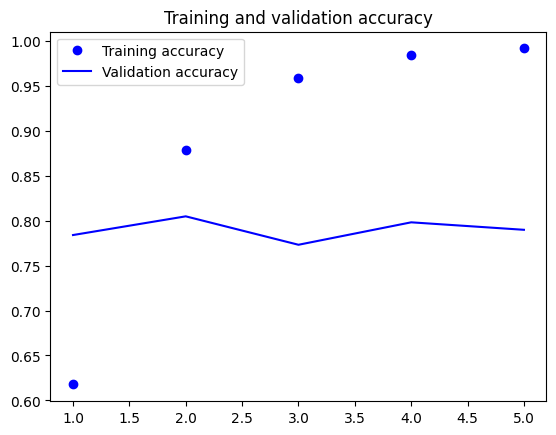

<Figure size 640x480 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

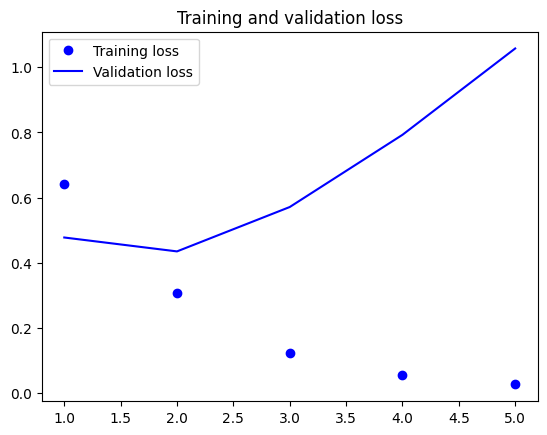

In [21]:
# Plot training & validation loss values
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ---------------------------------------------------------
# Create a TF-IDF vectorizer
# ---------------------------------------------------------
tfidf = TfidfVectorizer(
    max_features=20000,
    ngram_range=(1, 2)   # unigrams + bigrams for negation phrases
)

# ---------------------------------------------------------
# Fit on training text and transform into TF-IDF vectors
# (This learns the vocabulary + IDF weights)
# ---------------------------------------------------------
X_train_tfidf = tfidf.fit_transform(train_text)

# ---------------------------------------------------------
# Transform validation text using the SAME vocabulary
# ---------------------------------------------------------
X_val_tfidf = tfidf.transform(val_text)

# ---------------------------------------------------------
# Transform test text using the SAME vocabulary
# Ensures no information leakage from test/validation data
# ---------------------------------------------------------
X_test_tfidf = tfidf.transform(test_text)

In [23]:
from sklearn.linear_model import LogisticRegression

# ---------------------------------------------------------
# Create a Logistic Regression classifier
# max_iter=3000 → ensure convergence with high-dimensional TF-IDF vectors
# ---------------------------------------------------------
clf = LogisticRegression(max_iter=3000)

# ---------------------------------------------------------
# Train the classifier on TF-IDF features
# ---------------------------------------------------------
clf.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=3000)

In [24]:
from sklearn.metrics import accuracy_score

# ---------------------------------------------------------
# Predict sentiment labels for the test TF-IDF vectors
# ---------------------------------------------------------
y_pred = clf.predict(X_test_tfidf)

# ---------------------------------------------------------
# Calculate accuracy by comparing predictions with true labels
# ---------------------------------------------------------
acc = accuracy_score(y_test, y_pred)

# ---------------------------------------------------------
# Print the final test accuracy for the Logistic Regression model
# ---------------------------------------------------------
print("Logistic Regression Test Accuracy:", acc)

Logistic Regression Test Accuracy: 0.8316666666666667


In [25]:
from sklearn.svm import LinearSVC

# ---------------------------------------------------------
# Create a Linear Support Vector Machine classifier
# C=1.0 → regularization strength (default)
# LinearSVC works extremely well with high-dimensional TF-IDF vectors
# ---------------------------------------------------------
clf = LinearSVC(C=1.0)

# ---------------------------------------------------------
# Train the SVM model on TF-IDF features
# (Important: we use X_train_tfidf, NOT raw text)
# ---------------------------------------------------------
clf.fit(X_train_tfidf, y_train)

LinearSVC()

In [26]:
from sklearn.metrics import accuracy_score

# ---------------------------------------------------------
# Predict sentiment labels for the test set
# Important: use TF-IDF features (X_test_tfidf), not raw text
# ---------------------------------------------------------
y_pred = clf.predict(X_test_tfidf)

# ---------------------------------------------------------
# Compute accuracy by comparing predictions to true labels
# ---------------------------------------------------------
acc = accuracy_score(y_test, y_pred)

# ---------------------------------------------------------
# Print final test accuracy for the Linear SVC model
# ---------------------------------------------------------
print("Linear SVC Test accuracy:", acc)

Linear SVC Test accuracy: 0.835


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# ---------------------------------------------------------
# 1) Train a Logistic Regression classifier on TF-IDF vectors
# ---------------------------------------------------------
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)

# ---------------------------------------------------------
# 2) Predict labels for validation and test sets
# ---------------------------------------------------------
y_val_pred = clf.predict(X_val_tfidf)
y_test_pred = clf.predict(X_test_tfidf)

# ---------------------------------------------------------
# 3) Compute accuracy scores
# ---------------------------------------------------------
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# ---------------------------------------------------------
# 4) Print results
# ---------------------------------------------------------
print("-Validation Accuracy:", val_acc)
print("- Test Accuracy:", test_acc)

-Validation Accuracy: 0.8308333333333333
- Test Accuracy: 0.8316666666666667


In [28]:
def predict_sentiment(text: str) -> str:
    """
    Predict sentiment using Logistic Regression + TF-IDF.
    """

    # ---------------------------------------------------------
    # 1) Clean the raw input text using the same preprocessing
    #    applied during training
    # ---------------------------------------------------------
    cleaned = clean_text(text)

    # ---------------------------------------------------------
    # 2) Convert cleaned text into a TF-IDF vector
    #    IMPORTANT: use transform(), NOT fit_transform()
    #    because the TF-IDF vocabulary must remain identical
    # ---------------------------------------------------------
    X = tfidf.transform([cleaned])   # shape: (1, n_features)

    # ---------------------------------------------------------
    # 3) Get probability of the positive class
    #    predict_proba returns: [prob_negative, prob_positive]
    # ---------------------------------------------------------
    prob_pos = clf.predict_proba(X)[0, 1]

    # ---------------------------------------------------------
    # 4) Convert probability into a human-readable label
    # ---------------------------------------------------------
    label = "Positive" if prob_pos >= 0.5 else "Negative"

    return f"{label} (confidence: {prob_pos:.2f})"

In [29]:
print(predict_sentiment("I really loved this movie, it was amazing!"))
print(predict_sentiment("This was terrible and I hated every minute of it."))
print(predict_sentiment("the package is damaged"))
print(predict_sentiment("the delivery was on time and the product is perfect"))


Positive (confidence: 0.80)
Negative (confidence: 0.32)
Negative (confidence: 0.46)
Positive (confidence: 0.85)


In [30]:
# Manual test sentences (both positive and negative)
test_samples = [
    ("I absolutely loved this product, it worked perfectly!", "Positive"),
    ("The movie was fantastic and I would watch it again.", "Positive"),
    ("Amazing quality and outstanding service.", "Positive"),
    ("This is the worst thing I have ever bought.", "Negative"),
    ("Terrible experience, I will never use this again.", "Negative"),
    ("Completely disappointing and not worth the money.", "Negative"),
]

correct = 0
print("Manual test predictions:\n")

for text, true_label in test_samples:

    # ---------------------------------------------------------
    # 1) Run the sentiment classifier on the sample text
    # ---------------------------------------------------------
    pred_full = predict_sentiment(text)

    # Extract only the label ('Positive' or 'Negative')
    pred_label = pred_full.split()[0]

    # ---------------------------------------------------------
    # 2) Compare the predicted label with the true label
    # ---------------------------------------------------------
    is_correct = (pred_label == true_label)
    if is_correct:
        correct += 1

    # ---------------------------------------------------------
    # 3) Print detailed results for each sample
    # ---------------------------------------------------------
    print(f"Text: {text}")
    print(f"True: {true_label} | Predicted: {pred_full} | Correct: {is_correct}")
    print("-" * 80)

# ---------------------------------------------------------
# 4) Compute final accuracy on this small manual test list
# ---------------------------------------------------------
accuracy = correct / len(test_samples)
print(f"\nAccuracy on this small manual test set: {accuracy:.2%}")

Manual test predictions:

Text: I absolutely loved this product, it worked perfectly!
True: Positive | Predicted: Positive (confidence: 0.67) | Correct: True
--------------------------------------------------------------------------------
Text: The movie was fantastic and I would watch it again.
True: Positive | Predicted: Positive (confidence: 0.70) | Correct: True
--------------------------------------------------------------------------------
Text: Amazing quality and outstanding service.
True: Positive | Predicted: Positive (confidence: 0.87) | Correct: True
--------------------------------------------------------------------------------
Text: This is the worst thing I have ever bought.
True: Negative | Predicted: Negative (confidence: 0.28) | Correct: True
--------------------------------------------------------------------------------
Text: Terrible experience, I will never use this again.
True: Negative | Predicted: Negative (confidence: 0.43) | Correct: True
-------------------

In [31]:
!pip install gradio -q


In [32]:
import gradio as gr

def gradio_predict(text):
    return predict_sentiment(text)

demo = gr.Interface(
    fn=gradio_predict,
    inputs=gr.Textbox(lines=3, label="Enter a review sentence"),
    outputs=gr.Textbox(label="Predicted sentiment"),
    title="Review Sentiment Classifier",
    description="Type a review sentence to see if the model predicts Positive or Negative sentiment."
)

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://62d51f3d9fbad6c11a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
